In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset1.csv')
df.head(20)

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
5,11592605,HR,hr generalist summary dedicated focused admini...
6,25824789,HR,hr manager summary human resources manager ext...
7,15375009,HR,hr manager professional summary senior hr prof...
8,11847784,HR,hr specialist summary possess years experience...
9,32896934,HR,hr clerk summary translates business vision hr...


In [4]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [5]:
df.shape

(2484, 3)

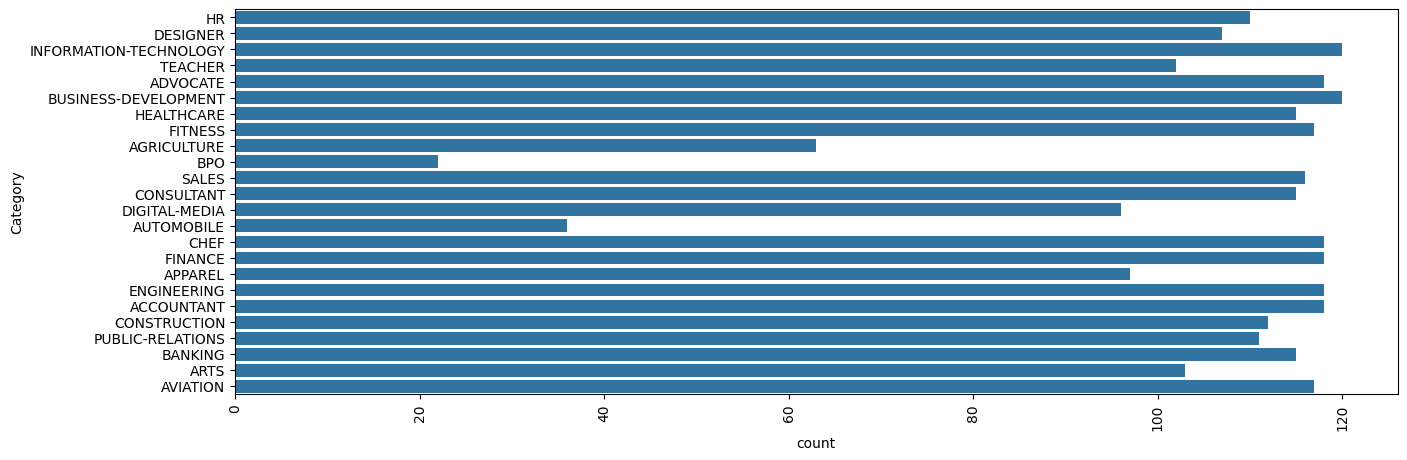

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

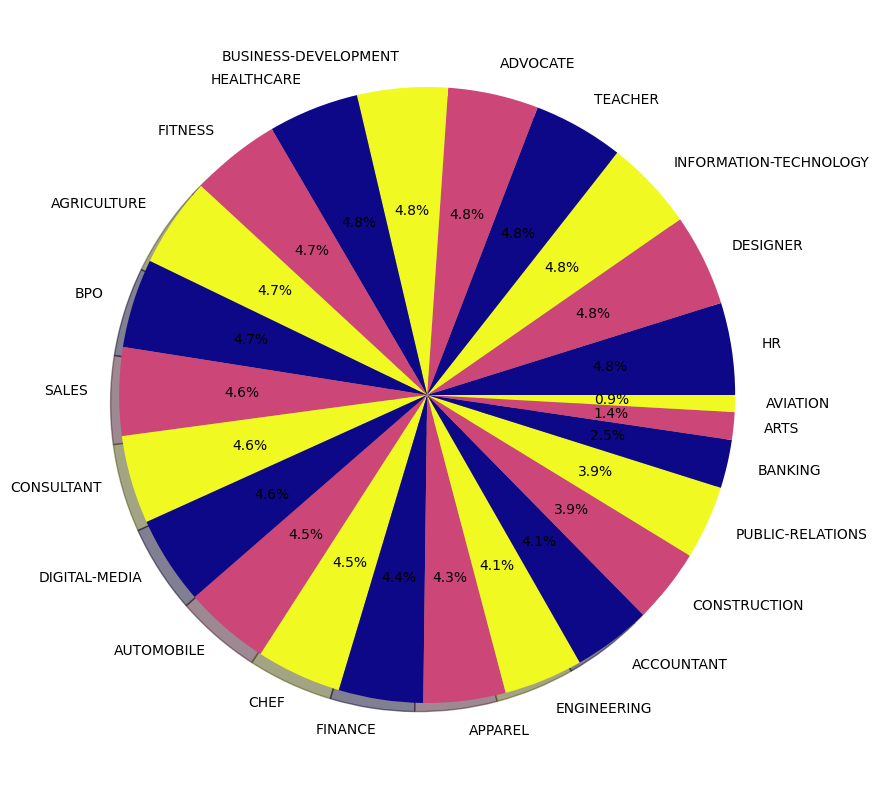

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [8]:
from sklearn.utils import resample

max_count = df['Category'].value_counts().max()


balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:

        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42) #Oversampling for categories with less sample
    else:

        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)


balanced_df = pd.concat(balanced_data)

In [9]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

In [10]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Accuracy: 0.8524305555555556
                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.90      0.83        21
              ADVOCATE       1.00      0.83      0.91        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.90      0.86      0.88        21
                  ARTS       0.94      0.73      0.82        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.93      0.93      0.93        30
               BANKING       0.89      0.74      0.81        23
                   BPO       0.94      1.00      0.97        15
  BUSINESS-DEVELOPMENT       0.61      0.61      0.61        18
                  CHEF       0.97      1.00      0.98        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.95      0.58      0.72        31
              DESIGNER       0.92      0.86      0.89        28
         D

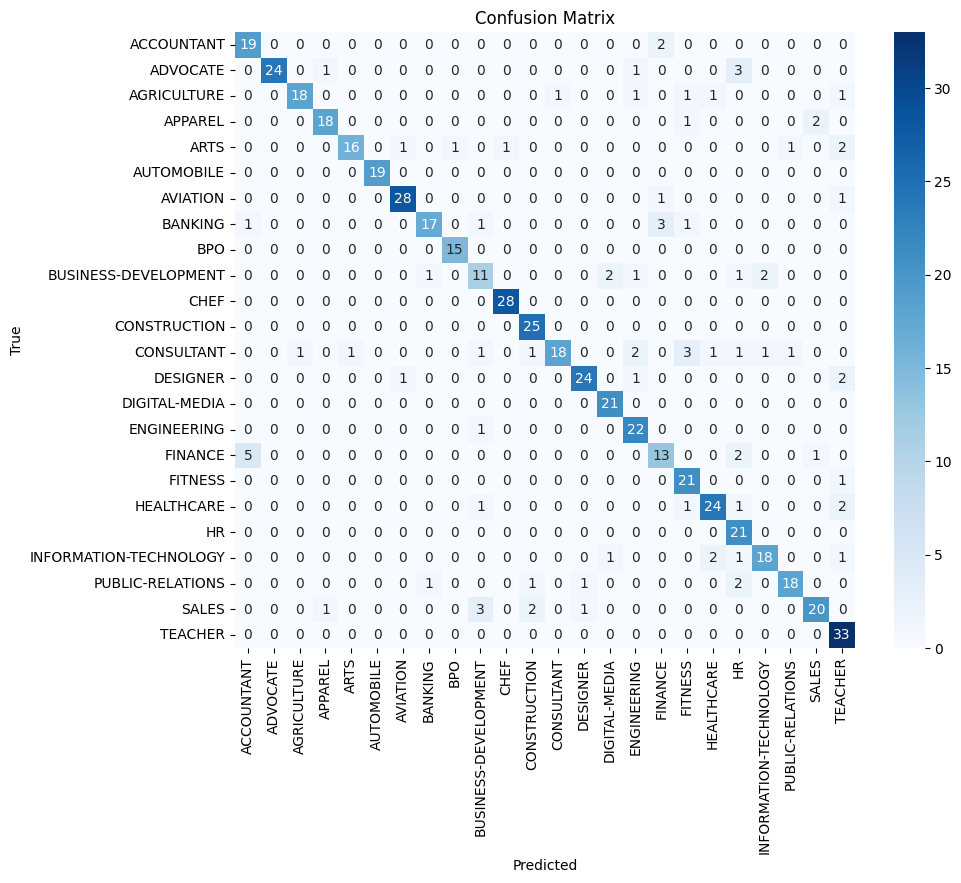

In [12]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

#  Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22565/2584693103.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
/tmp/ipykernel_22565/2584693103.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
/tmp/ipykernel_22565/2584693103.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
/tmp/ipykernel_22565/2584693103.py:8: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub('[%s]' % re.

In [14]:
resume_file ="""Diya Adhikary

Email: diyaadhikary2003@gmail.com
Mobile: +91-8240743679
Github: Diyaadhikary
Linkedin: Diya Adhikary

Education

• Techno Main Salt Lake

Bachelor of Technology- Information Technology; CGPA:8.32 (Upto 6th sem)

• St. Paul’s Boarding & Day School

ISC: Science; 87.83%

• St. Paul’s Boarding & Day School

ICSE: 89.5%

Kolkata, India
Sept 2021-June 2025

Kolkata, India
March 2021

Kolkata, India
March 2019

Skills Summary
• Languages: JAVA, SQL , Python
• Courses: Object Oriented Programming (OOPS), Data Structure and Algorithm (DSA), Operating Systems, Analysis Of

Algorithms, Networking, Databases, Artificial Intelligence

• Frameworks: ReactJS , Spring Boot , Java Swing
• Tools: GIT, GITHUB, MySQL, MS SQL Server , JDBC
• Platforms: Linux, Web, Windows, AWS, AZURE
• Soft Skills: Leadership, Event Management, Writing, Public Speaking, Time Management
Experience

• Celebal Technologies

DevOps Intern

Remote
May 2024 - July 2024

◦ Project - Centralized connectivity and security management with hub and spoke: Created a hub and
spoke model in Azure which involves a central hub network connecting to multiple spoke networks, facilitating
centralized connectivity, security enforcement, and traffic management, ideal for scalable and secure cloud
infrastructures

◦ Course: Completed coursework and assignments on topics associated with DevOps - Version Control using GIT,

Linux, AZURE Infrastructure - AZURE CLI, etc.

Projects
• Hospital Management System: Tech Stack : Java, JDBC, MySQL, Java Swing

◦ Developed a GUI-based application for managing hospital operations, including patient registration, doctor

information retrieval, and appointment scheduling.

◦ Implemented core OOP principles (encapsulation, inheritance) and database connectivity with MySQL using JDBC.

◦ Designed and executed SQL queries to manage patient, doctor, and appointment data, ensuring data integrity and

efficient retrieval.

◦ Created modular forms and views with Java Swing, enhancing user experience.

• SkillMingle : AI-Driven Talent Acquisition System (Final Year College Project): (Ongoing) Tech stack:

Python,React, MongoDB, NLP (SpaCy), ML algorithms (classification, predictive analytics)

◦ Developed an AI-powered recruitment platform that automates resume screening, candidate ranking, and interview

scheduling to optimize hiring processes

◦ Integrated NLP and ML for parsing resumes and ranking candidates based on job suitability, reducing bias and

improving candidate matching accuracy.

◦ Reduced hiring time and manual workload by 30%, providing a more personalized and equitable experience for both

recruiters and candidates.

Participation and Certifications

• Smart India Hackathon: Reached the second round, October 2023 (Link)
• Campus Left Shift Program By LTIMindtree in DevOps: April 2024 - August 2024
• Journey to Cloud: Envisioning Your Solution By IBM: May 2024 (Link)
Volunteer Experience

• Co-Tech Head at Association of Computing Machinery, Techno Main Salt Lake

Actively engaged in the global computing community through ACM membership

Kolkata, India
August 2023 - Present

• Content Writer at Hunar Ke Nawab, Techno Main Salt Lake
Curated social media posts for the various events held by the club

Kolkata, India
May 2022 - June 2023

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY
